### Attempting to solve the problem by Gaussian Mixtures Models (GMM) - forced to 3 components (not in the library yet)

Gaussian Mixture Models (GMM) - Gaussian Mixture Models is a probabilistic method by which sub-populations can be obtained from an overall population. Formally, a mixture model corresponds to the mixture distribution representing the probability distribution of the observations in the overall population. In particular, it used to provide information on the properties of sub-populations by having only the observation on the aggregate population without any information on the identity of the aggregate population.

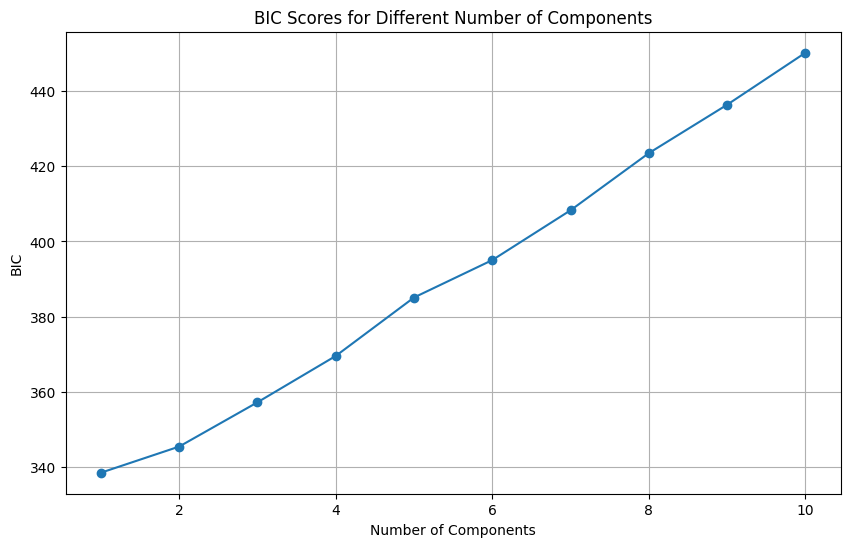

Optimal number of components: 3
Gaussian Mixture Model Parameters:
   Component      Mean  Covariance
0          1  0.419716    0.147565
1          2  2.266157    0.261563
2          3  1.156238    0.099252


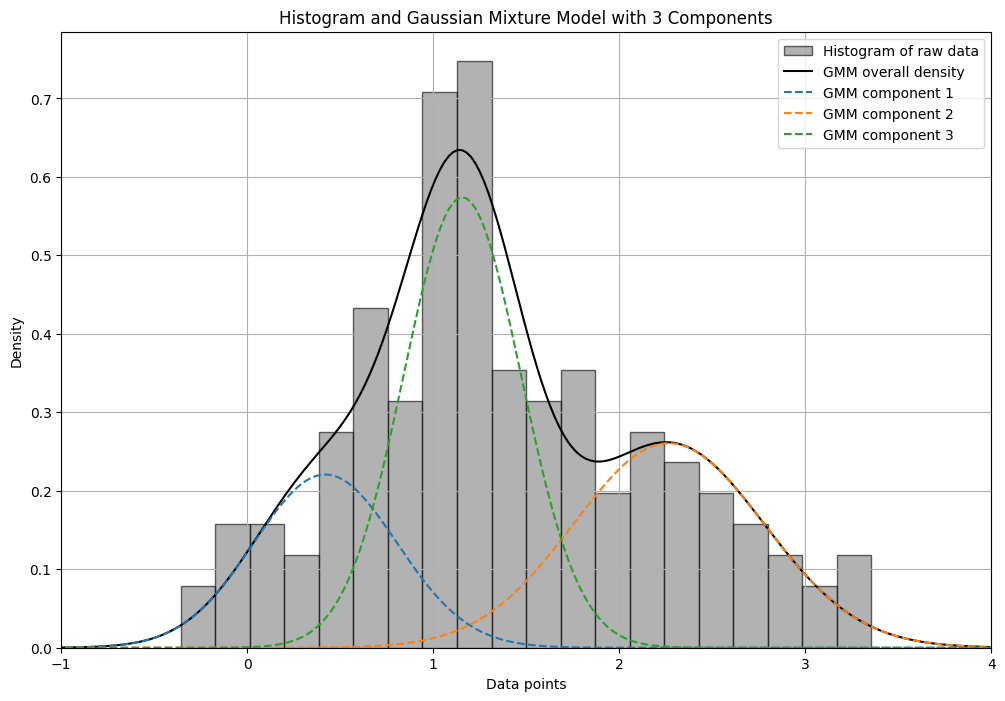

Means: [0.41971622 2.26615703 1.15623786]
Standard Deviations: [0.38414127 0.51143185 0.31504232]
Weights: [0.21252032 0.33415707 0.45332261]


In [5]:
import numpy as np
import pyco2stats as PyCO2
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

my_dataset = pd.read_excel('PYTHONSS.xlsx')

# Data: Replace this with your actual data array
data = my_dataset.A.values.reshape(-1, 1)

# Determine the optimal number of components using BIC
n_components = np.arange(1, 11)
bics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=0, covariance_type='spherical')
    gmm.fit(data)
    bics.append(gmm.bic(data))

# Plot BIC scores to visualize the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, marker='o')
plt.title('BIC Scores for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.grid()
plt.show()
# Optimal number of components
optimal_n_components = 3 # n_components[np.argmin(bics)]
print(f'Optimal number of components: {optimal_n_components}')

# Fit the Gaussian Mixture Model with the optimal number of components
optimal_gmm = GaussianMixture(n_components=optimal_n_components, random_state=0, covariance_type='spherical')
optimal_gmm.fit(data)

# Predict the component for each data point
labels = optimal_gmm.predict(data)



# Display GMM means and covariances
gmm_means = optimal_gmm.means_
gmm_covariances = optimal_gmm.covariances_

gmm_params = pd.DataFrame({
    'Component': range(1, optimal_n_components + 1),
    'Mean': gmm_means.flatten(),
    'Covariance': gmm_covariances.flatten()
})
print("Gaussian Mixture Model Parameters:")
print(gmm_params)

# Histogram and GMM components overlay
x = np.linspace(min(data) - 10, max(data) + 10, 1000).reshape(-1, 1)

# Calculate the GMM densities
logprob = optimal_gmm.score_samples(x)
responsibilities = optimal_gmm.predict_proba(x)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.figure(figsize=(12, 8))
plt.hist(data, bins=20, density=True, alpha=0.6, color='gray', edgecolor='black', label='Histogram of raw data')
plt.plot(x, pdf, '-k', label='GMM overall density')
for i in range(optimal_n_components):
    plt.plot(x, pdf_individual[:, i], '--', label=f'GMM component {i+1}')
plt.title(f'Histogram and Gaussian Mixture Model with {optimal_n_components} Components')
plt.xlabel('Data points')
plt.ylabel('Density')
plt.legend()
plt.xlim(-1,4)
plt.grid()
plt.show()
meds = optimal_gmm.means_
meds = meds.flatten()
print(f'Means: {meds}')

# Conver covariance into Standard Deviation
standard_deviations = np.sqrt(optimal_gmm.covariances_) 
stds = standard_deviations.flatten()
print(f'Standard Deviations: {stds}')

# Useful when plotting the distributions later
weights = optimal_gmm.weights_  
weights = weights.flatten()
print(f'Weights: {weights}')


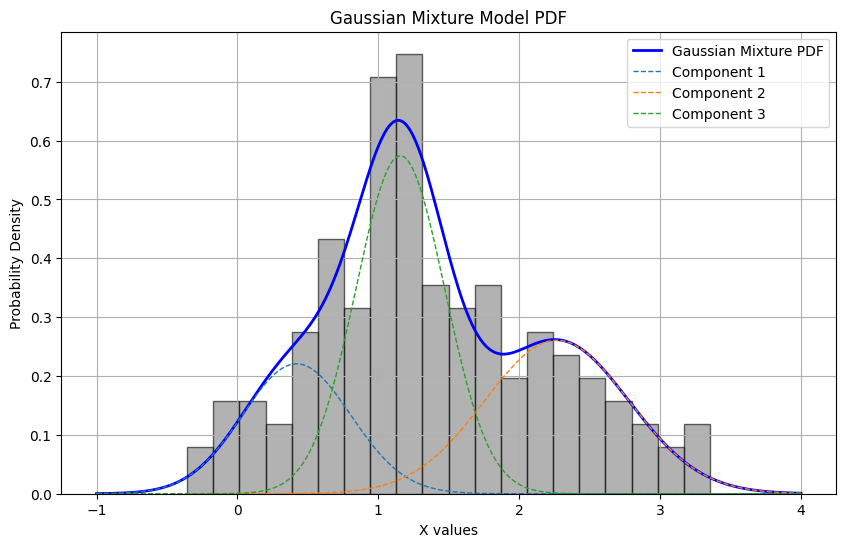

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Define the x values to evaluate the PDF
x = np.linspace(-1, 4, 500)

# Compute the Gaussian Mixture PDF
pdf = PyCO2.GMM.gaussian_mixture_pdf(x, meds, stds, weights)

fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size

pdf_plot_kwargs = {'color': 'blue', 'linewidth': 2}
component_plot_kwargs = {'linestyle': '--', 'linewidth': 1}
hist_plot_kwargs = {'alpha': 0.6, 'color': 'gray', 'edgecolor': 'black'}

PyCO2.Visualize.plot_gmm_pdf(ax, x, meds, stds, weights, data=data,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)


ax.set_title('Gaussian Mixture Model PDF')
ax.set_xlabel('X values')
ax.set_ylabel('Probability Density')
ax.grid()
ax.legend()
plt.show()

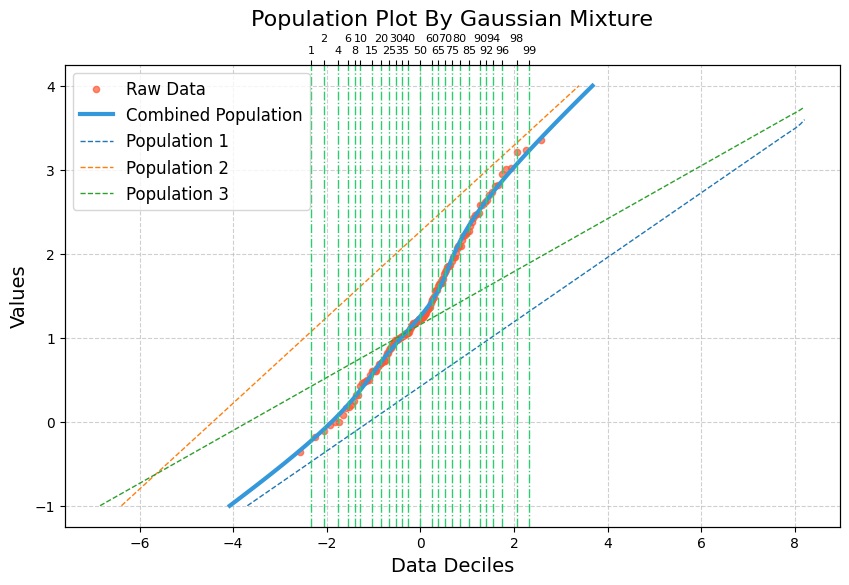

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
        
# Plot raw data with improved style
PyCO2.Visualize.pp_raw_data(my_dataset.A, marker='o', ax=ax, s=20, c='#FF5733', alpha=0.7, label='Raw Data')
        
# Plot combined population with enhanced styling
PyCO2.Visualize.pp_combined_population(meds, stds, weights, mminy=-1, mmaxy=4, ax=ax, linestyle='-', linewidth=3, color='#3498DB', label='Combined Population')

# Plot combined population with enhanced styling
PyCO2.Visualize.pp_single_populations(meds, stds, mminy=-1, mmaxy=4, ax=ax, linestyle='--', linewidth=1)
        
# Plot percentiles
PyCO2.Visualize.pp_add_percentiles(ax=ax, percentiles='full', linestyle='-.', linewidth=1, color='#2ECC71')
        
# Adding titles and labels
ax.set_title('Population Plot By Gaussian Mixture', fontsize=16)
ax.set_xlabel('Data Deciles', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
        
# Adding legend and grid
ax.legend(loc='best', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


### Gaussian Mixture Model by Gradient Descent and Constained Vaues of the Components
This methodology is used to determine te maximum and minimum points of a function of several variables. Specifically, one goes in search of points that satisfy optimality conditions. Is an iterative method for the optimisation of differentiable functions. At each iteration, it repleaces the exact valueof the gradient of the function with an estimate obtained by evaluating the gradient only on a subset of the addends. This model shows the method to obtain the differentiation of the X population in a probability density function.

Epoch 0, Loss: 232.771484375
Epoch 200, Loss: 218.1079559326172
Epoch 400, Loss: 202.8152618408203
Epoch 600, Loss: 188.40142822265625
Epoch 800, Loss: 177.98208618164062
Epoch 1000, Loss: 170.23635864257812
Epoch 1200, Loss: 164.6069793701172
Epoch 1400, Loss: 162.21444702148438
Epoch 1600, Loss: 161.4364013671875
Epoch 1800, Loss: 161.01112365722656
Epoch 2000, Loss: 160.3900146484375
Epoch 2200, Loss: 159.468994140625
Epoch 2400, Loss: 159.02194213867188
Epoch 2600, Loss: 158.9618377685547
Epoch 2800, Loss: 158.96688842773438
Epoch 3000, Loss: 158.9800262451172
Epoch 3200, Loss: 158.99537658691406
Epoch 3400, Loss: 159.01101684570312
Epoch 3600, Loss: 159.02549743652344
Epoch 3800, Loss: 159.03839111328125
Epoch 4000, Loss: 159.04931640625
Epoch 4200, Loss: 159.05838012695312
Epoch 4400, Loss: 159.0657196044922
Epoch 4600, Loss: 159.07167053222656
Epoch 4800, Loss: 159.07632446289062

Optimized Means:
 [0.65052086 1.1658819  2.2309647 ]

Optimized Standard Deviations:
 [0.4885272  0

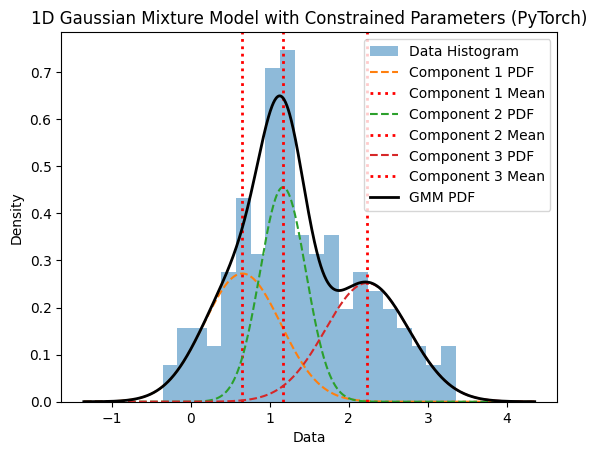

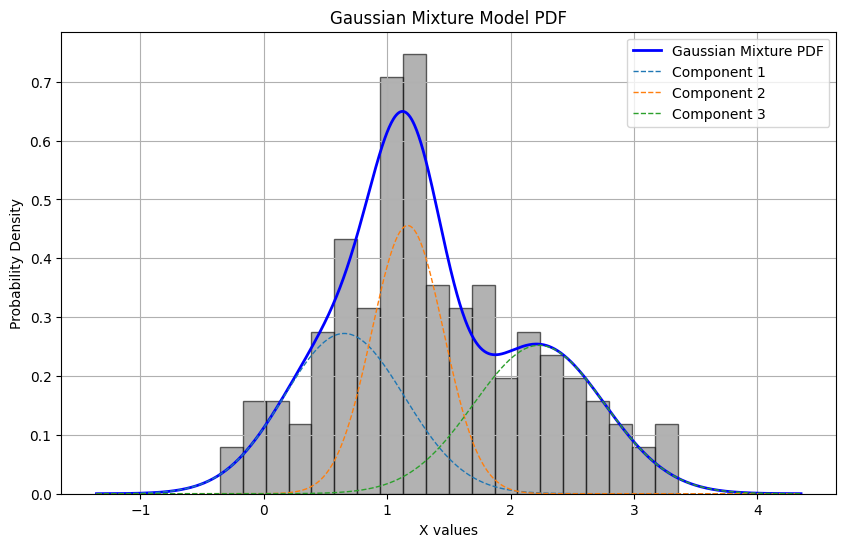

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example 1D data (replace this with your actual 1D data)
X = my_dataset.A

# Define the number of components
n_components=3

# Define constraints
mean_constraints = [(0.1, 2), (1, 3), (2, 4)]
std_constraints = [(0.1, 2.5), (0.1, 2.5), (0.1, 2.5)]
    
# Optimize GMM
optimized_means, optimized_stds, optimized_weights = PyCO2.GMM.constrained_gaussian_mixture(X, mean_constraints, std_constraints, n_components)
    
# Print the optimized parameters
print("\nOptimized Means:\n", optimized_means)
print("\nOptimized Standard Deviations:\n", optimized_stds)
print("\nOptimized Weights:\n", optimized_weights)

# Create a range of values for plotting
x_values = np.linspace(X.min() - 1, X.max() + 1, 1000)

# Plot the data histogram
plt.hist(X, bins=20, density=True, alpha=0.5, label='Data Histogram')

# Plot each Gaussian component using the norm.pdf function
for i in range(n_components):
    mean = optimized_means[i]
    std_dev = optimized_stds[i]
    weight = optimized_weights[i]
    
    # Calculate the Gaussian component's PDF
    component_pdf = weight * norm.pdf(x_values, loc=mean, scale=std_dev)
    
    # Plot the component's PDF
    plt.plot(x_values, component_pdf, '--', label=f'Component {i + 1} PDF')
    plt.axvline(mean, color='red', linestyle=':', linewidth=2, label=f'Component {i + 1} Mean')

# Plot the overall GMM PDF
overall_pdf = np.sum([optimized_weights[i] * norm.pdf(x_values, optimized_means[i], optimized_stds[i]) for i in range(n_components)], axis=0)
plt.plot(x_values, overall_pdf, '-k', label='GMM PDF', linewidth=2)

# Add plot details
plt.title('1D Gaussian Mixture Model with Constrained Parameters (PyTorch)')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size

pdf_plot_kwargs = {'color': 'blue', 'linewidth': 2}
component_plot_kwargs = {'linestyle': '--', 'linewidth': 1}
hist_plot_kwargs = {'alpha': 0.6, 'color': 'gray', 'edgecolor': 'black'}

PyCO2.Visualize.plot_gmm_pdf(ax, x_values, optimized_means, optimized_stds, optimized_weights, data=data,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)


ax.set_title('Gaussian Mixture Model PDF')
ax.set_xlabel('X values')
ax.set_ylabel('Probability Density')
ax.grid()
ax.legend()
plt.show()

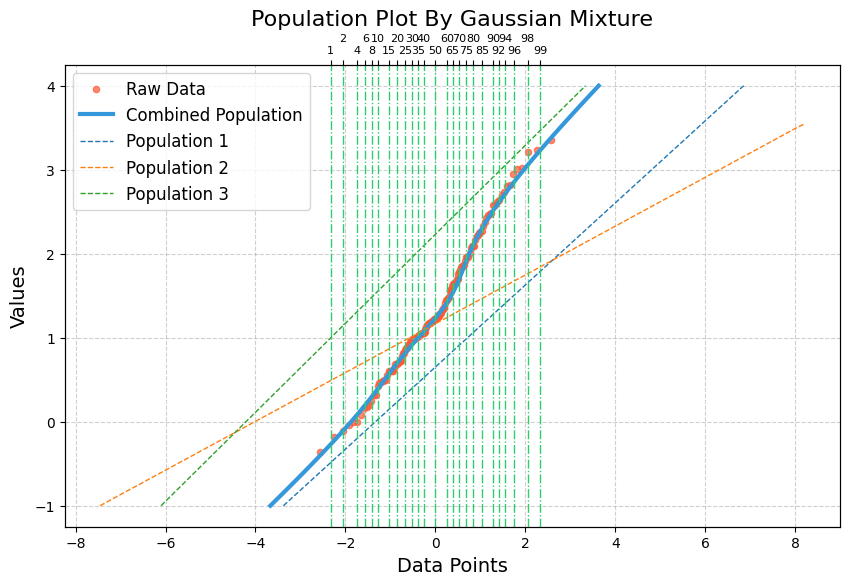

In [9]:
meds = optimized_means 
stds = optimized_stds 
weights = optimized_weights 

fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
        
# Plot raw data with improved style
PyCO2.Visualize.pp_raw_data(my_dataset.A, marker='o', ax=ax, s=20, c='#FF5733', alpha=0.7, label='Raw Data')
        
# Plot combined population with enhanced styling
PyCO2.Visualize.pp_combined_population(meds, stds, weights, mminy=-1, mmaxy=4, ax=ax, linestyle='-', linewidth=3, color='#3498DB', label='Combined Population')

# Plot combined population with enhanced styling
PyCO2.Visualize.pp_single_populations(meds, stds, mminy=-1, mmaxy=4, ax=ax, linestyle='--', linewidth=1)
        
# Plot percentiles
PyCO2.Visualize.pp_add_percentiles(ax=ax, percentiles='full', linestyle='-.', linewidth=1, color='#2ECC71')
        
# Adding titles and labels
ax.set_title('Population Plot By Gaussian Mixture', fontsize=16)
ax.set_xlabel('Data Points', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
        
# Adding legend and grid
ax.legend(loc='best', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
        
# Show the plot
plt.show()

### Gaussian Mixture Method (GMM) fitted using the Maximum Likelihood (ML) method
form 10.1016/j.ijggc.2016.02.012

Estimated Means: [2.03557037 7.9596912  4.96374573]
Estimated Standard Deviations: [0.51094143 0.74275407 0.27541228]
Estimated Weights: [0.40002132 0.25056201 0.34941667]


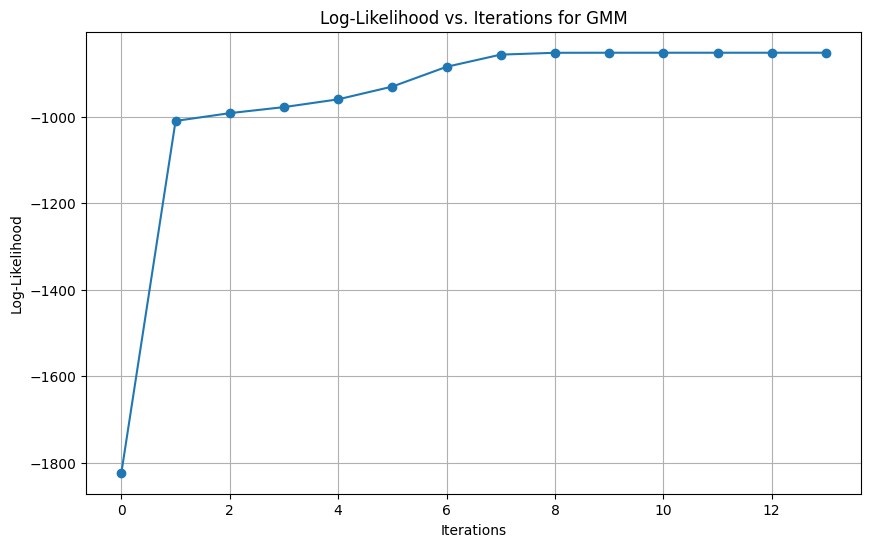

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data for demonstration
np.random.seed(0)
n_samples = 500
means = [2, 5, 8]
std_devs = [0.5, 0.3, 0.7]
weights = [0.4, 0.35, 0.25]

data = np.concatenate([np.random.normal(m, s, int(w * n_samples))
                       for m, s, w in zip(means, std_devs, weights)])

# Fit GMM using EM algorithm
n_components = 3
means, std_devs, weights, log_likelihoods = PyCO2.GMM.gaussian_mixture_em(data, n_components)

# Print the estimated parameters
print("Estimated Means:", means)
print("Estimated Standard Deviations:", std_devs)
print("Estimated Weights:", weights)

# Plot log-likelihood vs. iterations
plt.figure(figsize=(10, 6))
plt.plot(log_likelihoods, marker='o')
plt.title('Log-Likelihood vs. Iterations for GMM')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()

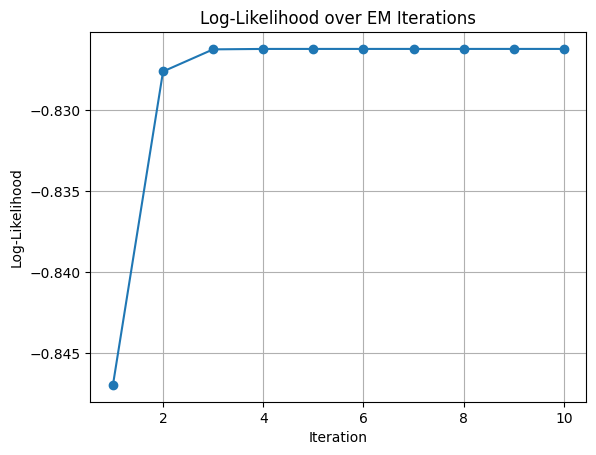


Optimized Means (original scale):
 [2.03557036 7.95969216 4.96374601]

Optimized Standard Deviations (original scale):
 [0.51094706 0.74275673 0.27542317]

Optimized Weights:
 [0.40002132 0.25056189 0.34941679]


In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# Generate synthetic data
X = data

X = X.reshape(-1, 1)  # Reshape for sklearn, which expects 2D array

original_means, original_std_devs, weights, max_iter, log_likelihoods = PyCO2.GMM.gaussian_mixture_sklearn(X, n_components = 3, max_iter = 10, tol = 1e-10, n_init = 20, suppress_warnings= True  )

# Plot the log-likelihood over iterations
plt.plot(range(1, max_iter + 1), log_likelihoods, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood over EM Iterations')
plt.grid(True)
plt.show()

# Print the optimized parameters
print("\nOptimized Means (original scale):\n", original_means)
print("\nOptimized Standard Deviations (original scale):\n", original_std_devs)
print("\nOptimized Weights:\n", weights)


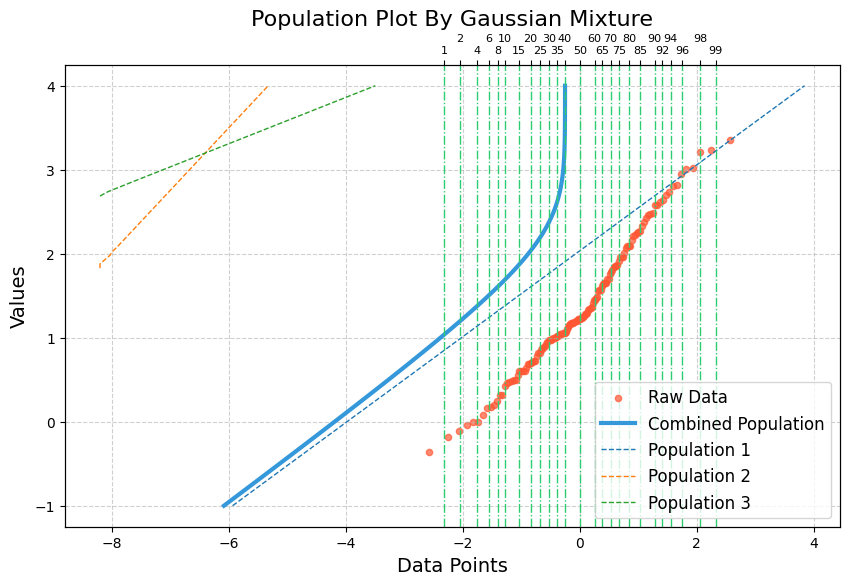

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
        
# Plot raw data with improved style
PyCO2.Visualize.pp_raw_data(my_dataset.A, marker='o', ax=ax, s=20, c='#FF5733', alpha=0.7, label='Raw Data')
        
# Plot combined population with enhanced styling
PyCO2.Visualize.pp_combined_population(means, std_devs, weights, mminy=-1, mmaxy=4, ax=ax, linestyle='-', linewidth=3, color='#3498DB', label='Combined Population')

# Plot combined population with enhanced styling
PyCO2.Visualize.pp_single_populations(means, std_devs, mminy=-1, mmaxy=4, ax=ax, linestyle='--', linewidth=1)
        
# Plot percentiles
PyCO2.Visualize.pp_add_percentiles(ax=ax, percentiles='full', linestyle='-.', linewidth=1, color='#2ECC71')
        
# Adding titles and labels
ax.set_title('Population Plot By Gaussian Mixture', fontsize=16)
ax.set_xlabel('Data Points', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
        
# Adding legend and grid
ax.legend(loc='best', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
        
# Show the plot
plt.show()